# Titanic Survivals Prediction

Loading libraries and Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from plotly import subplots
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split , GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
df = pd.read_csv('D:\\Users\\Desktop\\Data\\titanic\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Analyzing Data

<Axes: >

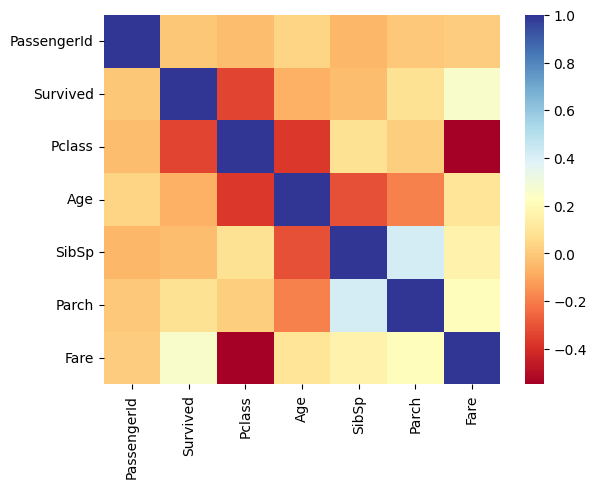

In [3]:
sns.heatmap(df.drop(columns=['Name','Sex','Ticket','Cabin','Embarked']).corr(),cmap="RdYlBu")


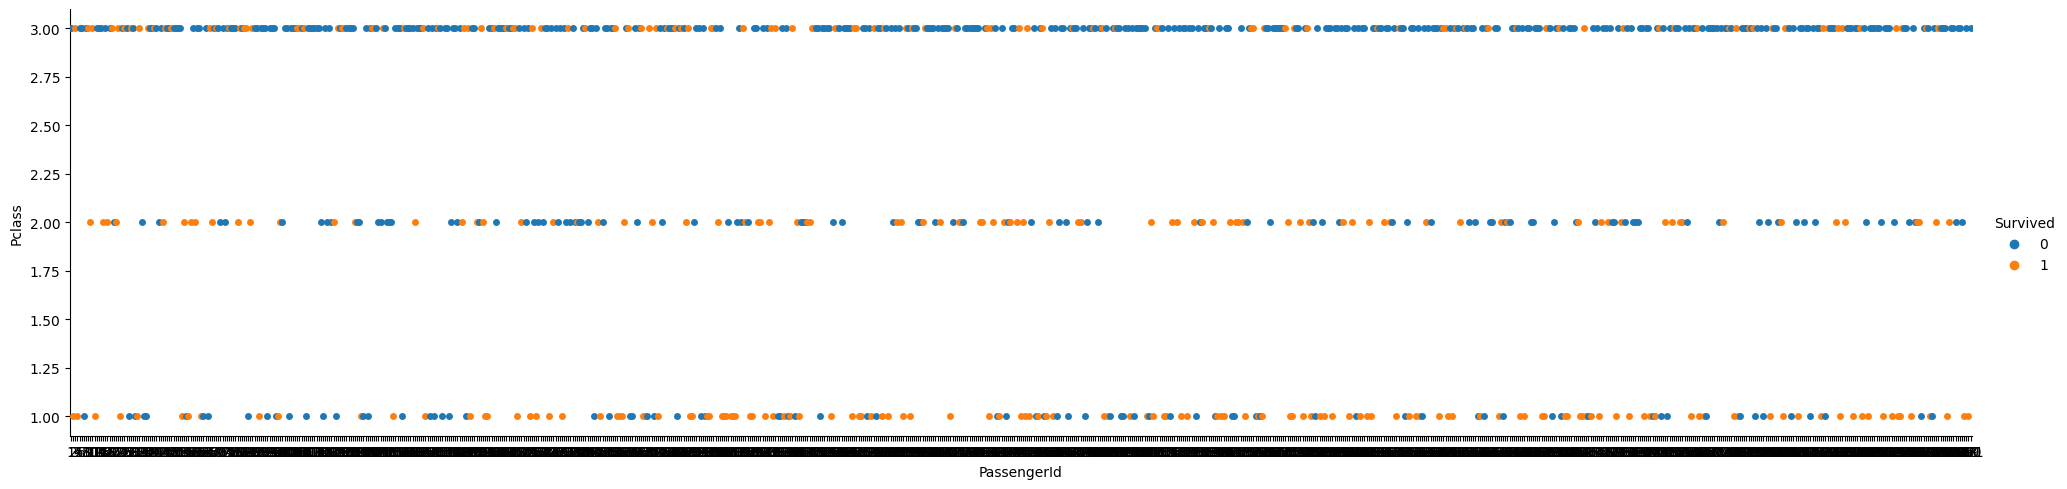

In [4]:
sns.catplot(data=df,x='PassengerId',y='Pclass',hue='Survived',aspect=4)


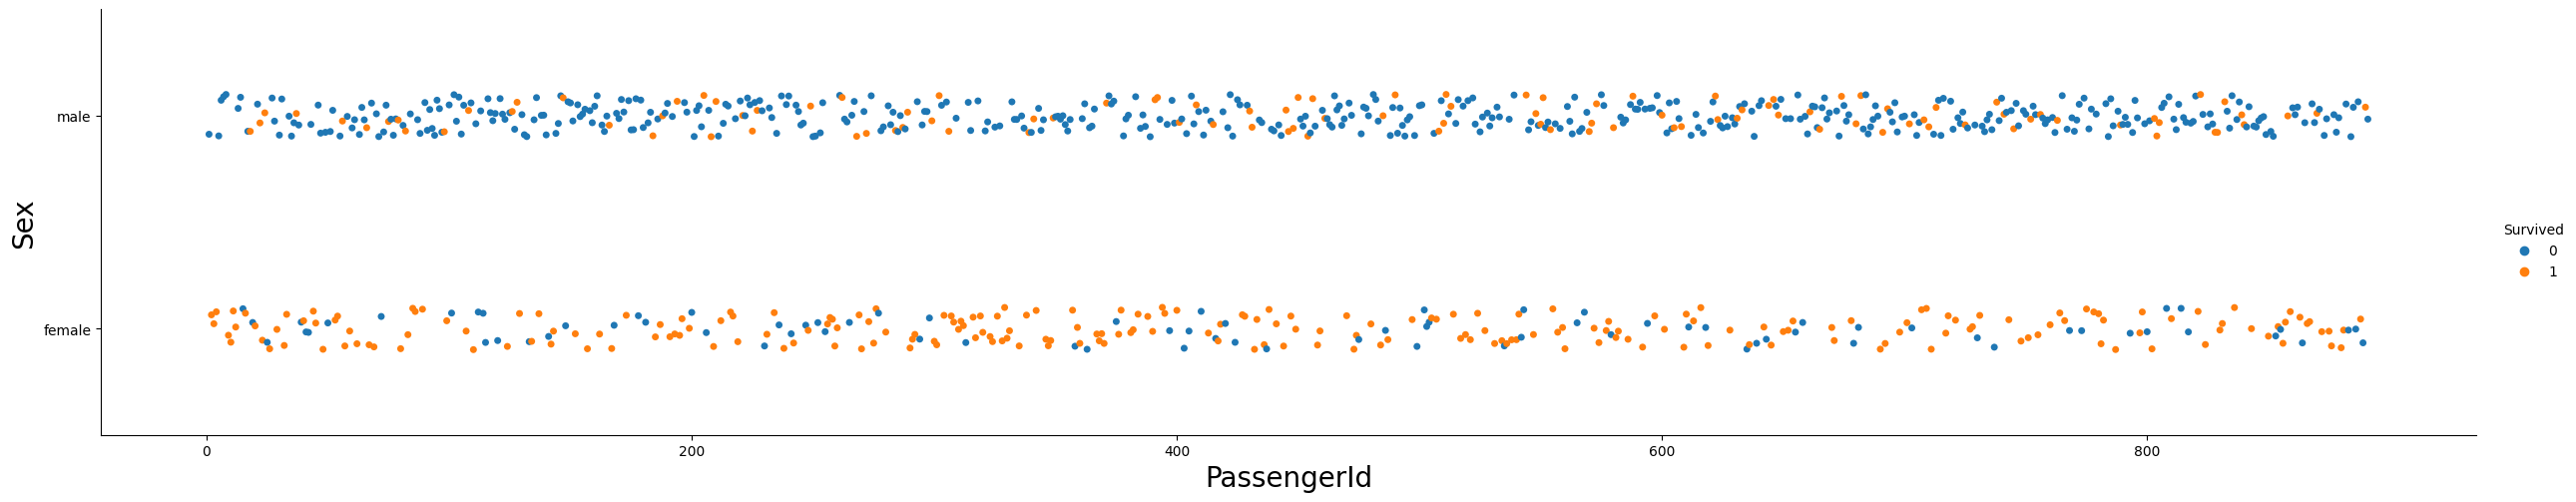

In [5]:
sns.catplot(y="Sex", x="PassengerId", hue="Survived", data=df, aspect = 5)
plt.xlabel("PassengerId",fontsize=20)
plt.ylabel("Sex",fontsize=20)
plt.show()

Cleaning Data

Removing Null Values

In [6]:
null_count = df.isnull().sum()
null_count = null_count[null_count > 0]
null_precentage = null_count / df.shape[0] *100
null_type = df[null_count.index].dtypes
nulls = {'Number of nulls':null_count , 'Percentage of nulls' : null_precentage , 'Type of nulls': null_type}
df_nulls = pd.DataFrame(nulls).sort_values('Number of nulls',axis=0,ascending=False)
df_nulls

,Number of nulls,Percentage of nulls,Type of nulls
Cabin,687,77.104377,object
Age,177,19.865320,float64
Embarked,2,0.224467,object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe().drop(columns=['Survived','Pclass'	,'SibSp','Parch'])

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [9]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
df['Embarked'].replace( np.nan , 'S',inplace=True)
df['Embarked'].isnull().sum()


0

In [11]:
df = df.drop(columns='Cabin',axis=1)


In [12]:
df['Age'].replace(np.nan,30,inplace=True)
df.isnull().sum()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Turn categorical variables to numerical 

In [15]:
encoder = OneHotEncoder()
onehot_encoded = encoder.fit_transform(df[['Sex']])
df_sex = pd.DataFrame(onehot_encoded.toarray(),columns=encoder.get_feature_names_out(['Sex']))  
df_new = pd.concat([df,df_sex],axis=1)


In [16]:
onehot_encoded1 = encoder.fit_transform(df[['Embarked']])
df_embarked = pd.DataFrame(onehot_encoded1.toarray(),columns=encoder.get_feature_names_out(['Embarked']))  
df_new1 = pd.concat([df_new,df_embarked],axis=1)
df_new1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0.0,1.0,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1.0,0.0,0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S,1.0,0.0,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0.0,1.0,1.0,0.0,0.0


Data visualization 

1 stands for survived and 0 stands for not survived
Survived
0    549
1    342
Name: count, dtype: int64


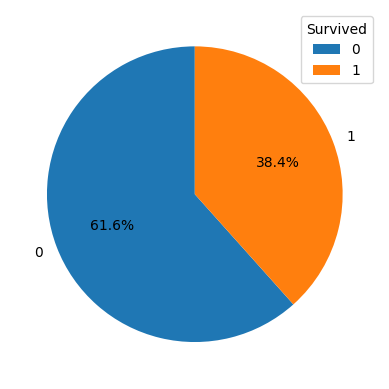

In [13]:
x = df['Survived'].value_counts()
print('1 stands for survived and 0 stands for not survived')
print(x)
plt.figure()
plt.pie(x,labels=x.index.to_list(),autopct='%1.1f%%', startangle=90)
plt.legend(x.index, title='Survived', loc='upper right')
plt.show()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


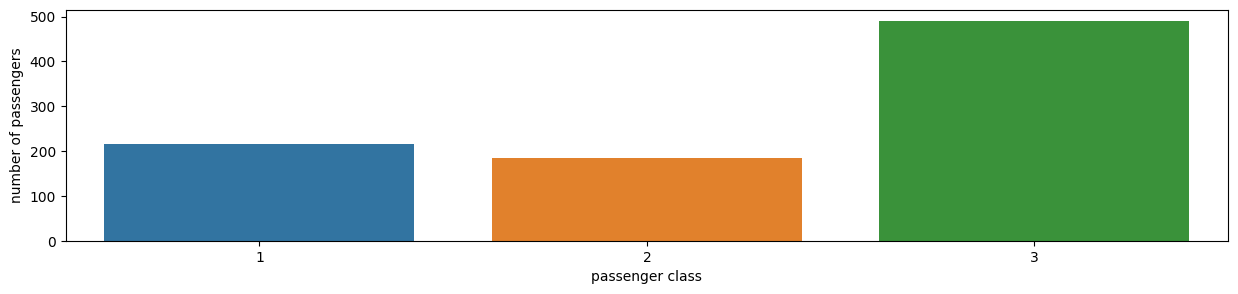

In [14]:
print(df['Pclass'].value_counts())
plt.figure(figsize=(15,3))
sns.countplot(df,x='Pclass')
plt.xlabel('passenger class')
plt.ylabel('number of passengers')
plt.show()

In [17]:
df = df_new1
df = df[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex_female',	'Sex_male',	'Embarked_C',	'Embarked_Q',	'Embarked_S','Survived']].astype(int)
df.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,3,22,1,0,7,0,1,0,0,1,0
1,2,1,38,1,0,71,1,0,1,0,0,1
2,3,3,26,0,0,7,1,0,0,0,1,1
3,4,1,35,1,0,53,1,0,0,0,1,1
4,5,3,35,0,0,8,0,1,0,0,1,0


<Axes: >

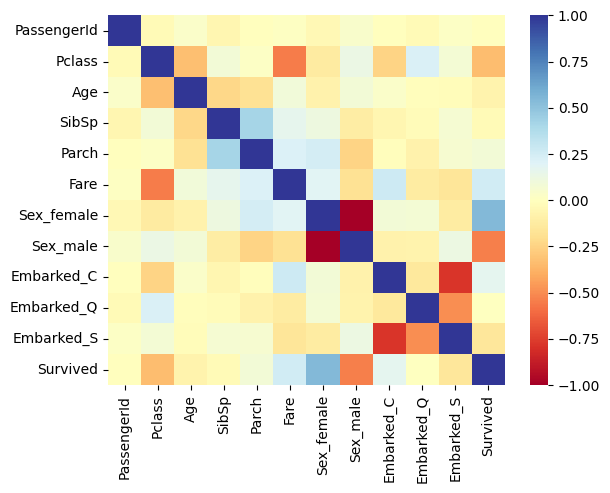

In [18]:
sns.heatmap(df.corr(),cmap="RdYlBu")


Data Modeling

In [31]:
from sklearn.model_selection import train_test_split , GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
x = df.drop(columns=['Survived']).values 
y = df['Survived'].values
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)




In [32]:
model = KNeighborsClassifier()
parameters =  {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
grid_knn = GridSearchCV(model,parameters,cv=3)
grid_knn.fit(x_train,y_train)
best_model_knn = grid_knn.best_estimator_
grid_knn.best_score_ , best_model_knn

(0.8146355588648961, KNeighborsClassifier(n_neighbors=7))

In [33]:
yhat = best_model_knn.predict(x_test)
metrics.accuracy_score(y_test,yhat)

0.7877094972067039

In [28]:
def preparing_data (x):
 encoder = OneHotEncoder()
 onehot_encoded = encoder.fit_transform(x[['Sex']])
 df_sex1 = pd.DataFrame(onehot_encoded.toarray(),columns=encoder.get_feature_names_out(['Sex']))  
 onehot_encoded1 = encoder.fit_transform(x[['Embarked']])
 df_embarked1 = pd.DataFrame(onehot_encoded1.toarray(),columns=encoder.get_feature_names_out(['Embarked']))  
 df_test_1 = pd.concat([x,df_sex1],axis=1)
 df_test_new = pd.concat([df_test_1,df_embarked1],axis=1)

 df_test_new = df_test_new[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex_female',	'Sex_male',	'Embarked_C',	'Embarked_Q',	'Embarked_S']].astype(int)
 return(df_test_new)

In [25]:
df_test = pd.read_csv('D:\\Users\\Desktop\\Data\\titanic\\test.csv')
df_test.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
df_test['Age'].replace(np.nan,df_test['Age'].mean(),inplace=True)
df_test['Fare'].replace(np.nan,df_test['Fare'].mean(),inplace=True)
df_test.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [29]:
df_test = preparing_data(df_test)
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34,0,0,7,0,1,0,1,0
1,893,3,47,1,0,7,1,0,0,0,1
2,894,2,62,0,0,9,0,1,0,1,0
3,895,3,27,0,0,8,0,1,0,0,1
4,896,3,22,1,1,12,1,0,0,0,1


In [34]:
x_test_new = df_test.values
x_test_new = StandardScaler().fit_transform(x_test_new)
predicted_values = best_model_knn.predict(x_test_new)


In [35]:
df_test['Survived'] = predicted_values
last_submission = df_test[['PassengerId','Survived']]
last_submission.to_csv('Submission.csv',index=False)



In [36]:
df_test.head(30)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,3,34,0,0,7,0,1,0,1,0,0
1,893,3,47,1,0,7,1,0,0,0,1,0
2,894,2,62,0,0,9,0,1,0,1,0,0
3,895,3,27,0,0,8,0,1,0,0,1,0
4,896,3,22,1,1,12,1,0,0,0,1,0
5,897,3,14,0,0,9,0,1,0,0,1,0
6,898,3,30,0,0,7,1,0,0,1,0,1
7,899,2,26,1,1,29,0,1,0,0,1,0
8,900,3,18,0,0,7,1,0,1,0,0,1
9,901,3,21,2,0,24,0,1,0,0,1,0
